In [71]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [72]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('cork_property_prices*.csv')], ignore_index = True)

In [73]:
df = df.drop_duplicates()

In [75]:
df.head()
df.describe()

,listing_id,beds,bathrooms,num_pics
count,2.090000e+02,209.000000,209.000000,209.000000
mean,2.345600e+06,3.712919,2.368421,18.583732
std,2.433480e+05,0.884631,1.144871,10.202937
min,1.199531e+06,2.000000,0.000000,1.000000
25%,2.237405e+06,3.000000,1.000000,12.000000
50%,2.407427e+06,4.000000,2.000000,17.000000
75%,2.530169e+06,4.000000,3.000000,23.000000
max,2.566722e+06,8.000000,6.000000,69.000000


In [97]:
# Clean data
df['cost'] = df['cost'].str.replace(",","") # Remove commas in cost column
df = df[(df.cost.str.isnumeric() == True)] # Remove rows with alpha characters
df['cost'] = pd.to_numeric(df['cost'])
type(df.cost[1])

numpy.int64

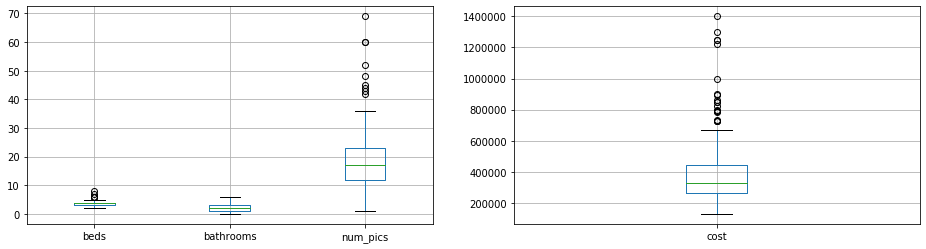

In [113]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.tight_layout()
plt.subplot(1, 2, 1)
pd.DataFrame(df,columns=["beds","bathrooms","num_pics"]).boxplot()
plt.subplot(1, 2, 2)
pd.DataFrame(df,columns=["cost"]).boxplot()

In [133]:
# Explore data by location
#df.plot.line(data=df["beds","cost"], x="beds", y="cost")
#df[["beds","cost","location"]].groupby('location','beds').plot(x="beds", y="cost")
df.groupby(['location', 'beds'])['cost'].mean()/1000

location         beds
ballincollig     3        248.535714
                 4        378.388889
bishopstown      2        285.000000
                 3        332.500000
                 4        414.750000
                 5        449.666667
blackrock        2        269.000000
                 3        331.666667
                 4        447.909091
                 6       1057.500000
carrigaline      2        265.000000
                 3        237.625000
                 4        416.578947
                 5        417.500000
                 6       1400.000000
douglas          2        236.333333
                 3        280.952381
                 4        456.350000
                 5        860.625000
                 6        785.000000
                 7        825.000000
glasheen         3        307.666667
                 4        386.666667
model-farm-road  2        250.000000
                 3        559.000000
                 4        558.333333
                

In [129]:
df

,listing_id,location,address,beds,bathrooms,cost,num_pics,property_type,ber
0,2549894,douglas,Kincora| South Douglas Road| Douglas| Co. Cork,3,1,259000,24,Semi-Detached House,NaN
1,2255069,douglas,Denmead| 38 Hettyfield Park| Douglas| Co. Cork,4,4,795000,23,Detached House,D1
2,2217312,douglas,80 Yewlands| Maryborough Woods| Douglas| Co. Cork,3,3,310000,8,Terraced House,C1
3,2548380,douglas,115 Greenhills Court| South Douglas Road| Doug...,3,2,245000,33,Terraced House,C3
4,2255031,douglas,10 Springbrook| Donnybrook| Douglas| Co. Cork,3,3,249000,16,Semi-Detached House,D1
5,2154356,douglas,Clogheen| Hettyfield Park| Douglas| Co. Cork,5,4,725000,33,Detached House,D1
6,2069030,douglas,8 Lislee Road| Maryborough Estate| Douglas| Co...,4,2,489000,12,Detached House,D2
7,2125026,douglas,Emeralda| 12 Ballincurrig Park| Douglas| Co. Cork,4,1,425000,18,Semi-Detached House,D2
8,2526196,douglas,10 Rathmore Lawn| Douglas| Co. Cork,3,1,375000,10,Semi-Detached House,E1
9,2563871,douglas,16 Inchvale Close| Shamrock Lawn| Douglas| Co....,3,1,240000,14,Semi-Detached House,_G
